### Predicting Fuel Efficiency


In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# warning
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Load the data as a Pandas data frame.
df = pd.read_csv("auto-mpg.csv")

In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
df.shape

(398, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [7]:
#Prep the data for modeling.
#Remove the car name column
df.drop(['car name'], axis=1, inplace=True)

In [8]:
#The horsepower column values likely imported as a string data type. 
#Figure out why and replace any strings with the column mean.
df.horsepower.info()

<class 'pandas.core.series.Series'>
RangeIndex: 398 entries, 0 to 397
Series name: horsepower
Non-Null Count  Dtype 
--------------  ----- 
398 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [9]:
df.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

Based on the unique values, the horsepower column contains a string value ('?'), thus, this column is assigned an object data type.

In [10]:
df[df['horsepower'].str.contains(r"\?")]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
32,25.0,4,98.0,?,2046,19.0,71,1
126,21.0,6,200.0,?,2875,17.0,74,1
330,40.9,4,85.0,?,1835,17.3,80,2
336,23.6,4,140.0,?,2905,14.3,80,1
354,34.5,4,100.0,?,2320,15.8,81,2
374,23.0,4,151.0,?,3035,20.5,82,1


In [11]:
hp_mean = pd.to_numeric(df['horsepower'], errors='coerce').mean()

In [12]:
hp_mean

104.46938775510205

In [13]:
df['horsepower'] = df['horsepower'].str.replace('?', '105', regex=True)

In [14]:
df['horsepower'] = df.horsepower.astype(int)

In [15]:
#Create dummy variables for the origin column.
dummy_origin = pd.get_dummies(df['origin'])

In [16]:
dummy_origin.head()

,1,2,3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [17]:
#Create a correlation coefficient matrix and/or visualization. Are there features highly correlated with mpg?
corr_matrix = df.corr()
print(corr_matrix)

                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.775396     -0.804203   -0.771316 -0.831741   
cylinders    -0.775396   1.000000      0.950721    0.838800  0.896017   
displacement -0.804203   0.950721      1.000000    0.893515  0.932824   
horsepower   -0.771316   0.838800      0.893515    1.000000  0.860457   
weight       -0.831741   0.896017      0.932824    0.860457  1.000000   
acceleration  0.420289  -0.505419     -0.543684   -0.684125 -0.417457   
model year    0.579267  -0.348746     -0.370164   -0.411537 -0.306564   
origin        0.563450  -0.562543     -0.609409   -0.453731 -0.581024   

              acceleration  model year    origin  
mpg               0.420289    0.579267  0.563450  
cylinders        -0.505419   -0.348746 -0.562543  
displacement     -0.543684   -0.370164 -0.609409  
horsepower       -0.684125   -0.411537 -0.453731  
weight           -0.417457   -0.306564 -0.581024  
acceleration      1.000000    0.2881

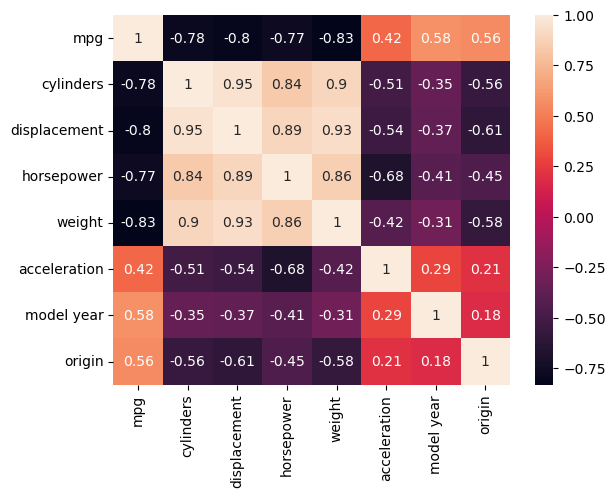

In [18]:
#Visual representation of the correlation matrix using seaborn and matplotlib
sns.heatmap(corr_matrix, annot=True)
plt.show()

Cylinders, displacement, horsepower and weight all show a strong negative correlation with mpg.

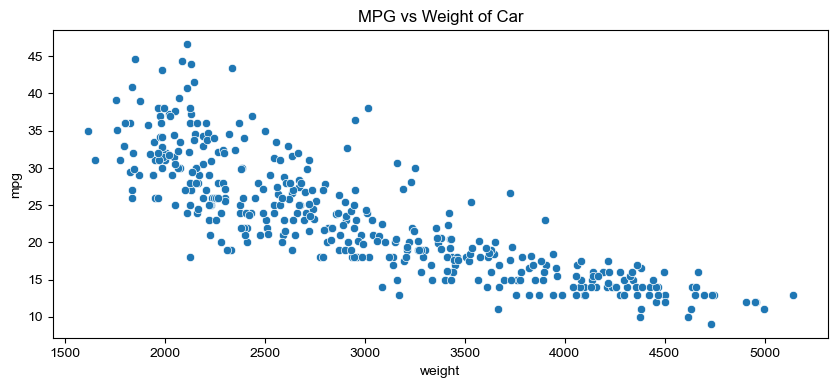

In [19]:
#Plot mpg versus weight. Analyze this graph and explain how it relates to the corresponding correlation 
#coefficient.
plt.figure(figsize=(10,4))

sns.scatterplot(data=df, x='weight', y='mpg')
sns.set_style("whitegrid")
plt.title('MPG vs Weight of Car')

plt.show()

The plot of MPG vs weight aligns with the correlation coefficient (-0.83). There is a strong negative correlation between mpg and weight. As the weight of the car increases, the mpg of the car decreases. This also makes sense in reality as more energy is required to run heavier cars.

In [20]:
#Randomly split the data into 80% training data and 20% test data, where your target is mpg.
y = df['mpg']
x = df.drop('mpg', axis = 1)

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [22]:
x_train.shape[0] == y_train.shape[0] 

True

In [23]:
x_test.shape[0] == y_test.shape[0]

True

In [24]:
#Taking the average of the target variable as this will be helpful for analysis.
df.mpg.mean()

23.514572864321615

In [25]:
#Train an ordinary linear regression on the training data.
regression = LinearRegression()
model = regression.fit(x_train, y_train)

In [26]:
y_predicted = regression.predict(x_test)

In [27]:
y_train_pred = regression.predict(x_train)

In [28]:
#Calculate R2, RMSE, and MAE on both the training and test sets.
r2_train = model.score(x_train, y_train) #r2 for train set
print(r2_train)

0.8139510680402732


In [29]:
r2_test = model.score(x_test, y_test) #r2 for test set
print(r2_test)

0.8475746159426842


Interpretation of R2 Values: Both R2 values are in greater than 80% whcih indicates that 80% of the variability of the target variable can be explained by the model. 

In [30]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred)) #rmse for train set
print(rmse_train)

3.415342622125864


In [31]:
rmse_test = np.sqrt(mean_squared_error(y_test, y_predicted)) #rmse for test set
print(rmse_test)

2.8627558117991514


Interpretation of RMSE results: The RMSE values are relatively low considering the values of the target variable (mpg, mean=23.5). The low RMSE values show the the model is quite accurate.

In [32]:
mae_train = mean_absolute_error(y_train, y_train_pred) #mae for train set
print(mae_train)

2.5992940320549813


In [33]:
mae_test = mean_absolute_error(y_test, y_predicted) #mae for test set
print(mae_test)

2.2532974033746327


Interpretation of MAE results: Similar to the RMSE results, the MAE values are relatively low considering the values of the target variable (mpg, mean=23.5). The low MAE values show the the model is quite accurate.

In [34]:
#Polynomial regression model

poly = PolynomialFeatures(degree=2)

x_train2 = poly.fit_transform(x_train)
x_test2 = poly.fit_transform(x_test)

poly_regr = linear_model.LinearRegression()
model2 = poly_regr.fit(x_train2, y_train)

y_pred_train2 = poly_regr.predict(x_train2)
y_pred_test2 = poly_regr.predict(x_test2)

In [35]:
#calculating for R2, RMSE and MAE

r2_train2 = model2.score(x_train2, y_train) #r2 for train set
r2_test2 = model2.score(x_test2, y_test) #r2 for train set

rmse_train2 = np.sqrt(mean_squared_error(y_train, y_pred_train2)) #rmse for train set
rmse_test2 = np.sqrt(mean_squared_error(y_test, y_pred_test2)) #rmse for train set

mae_train2 = mean_absolute_error(y_train, y_pred_train2) #mae for train set
mae_test2 = mean_absolute_error(y_test, y_pred_test2) #mae for test set

In [36]:
print(f"""R2 for Poly Train Set: {r2_train2}
R2 for Poly Test Set: {r2_test2}
RMSE for Poly Train Set: {rmse_train2}
RMSE for Poly Test Set: {rmse_test2}
MAE for Poly Train Set: {mae_train2}
MAE for Poly Test Set: {mae_test2}""")

R2 for Poly Train Set: 0.8920695585360139
R2 for Poly Test Set: 0.8872599626162633
RMSE for Poly Train Set: 2.6013133160355766
RMSE for Poly Test Set: 2.4620379522593843
MAE for Poly Train Set: 1.9056144272375546
MAE for Poly Test Set: 1.8640763070946562


The R2 results are higher while the RMSE and MAE results are lower for the Polynomial Regression Model compared to the corresponding metric values from the Linear Regression model, which indicates that the Polynomial Regression model is slightly better in the prediction of the target variable.